In [ ]:
#Assingment 2
#Q1
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('contact_lens.tif', cv2.IMREAD_GRAYSCALE)


sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1)

sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(sobelxy, cmap='gray')
plt.title('X and Y')
plt.axis('off')
plt.show()


In [ ]:
#Q1_d   
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('contact_lens.tif')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)

thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 15)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

(x,y), radius = cv2.minEnclosingCircle(contours[0])
cv2.circle(img, (int(x),int(y)), int(radius), (0,255,0), 2)

center, diameter = (int(x),int(y)), int(radius*2)

cv2.circle(img, center, diameter//2, (0,0,255), 2)

cv2.putText(img, 'Center: '+str(center), (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2.putText(img, 'Radius: '+str(diameter//2), (50,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

cv2.namedWindow('Contact Lens', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Contact Lens', 800, 600)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
#Q2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_range = y_range = np.arange(-3, 3.1, 0.1)

sigma = 1

X, Y = np.meshgrid(x_range, y_range)

dx = -(X / (sigma**2)) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))

dy = -(Y / (sigma**2)) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, dx, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('dx')
plt.title('Derivative of Gaussian kernel in x-direction')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, dy, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('dy')
plt.title('Derivative of Gaussian kernel in y-direction')
plt.show()


In [8]:
#Q3 a
import numpy as np
import cv2

# Set the sigma values
sigma1 = 1
sigma2 = 3

# Create a range of coordinates from -5 to 5
x = np.arange(-5, 6)
y = np.arange(-5, 6)

# Compute the derivative of Gaussian kernels for sigma1
dx1 = -x * np.exp(-(x**2 + y**2)/(2*sigma1**2)) / (2*np.pi*sigma1**4)
dy1 = -y * np.exp(-(x**2 + y**2)/(2*sigma1**2)) / (2*np.pi*sigma1**4)

# Compute the derivative of Gaussian kernels for sigma2
dx2 = -x * np.exp(-(x**2 + y**2)/(2*sigma2**2)) / (2*np.pi*sigma2**4)
dy2 = -y * np.exp(-(x**2 + y**2)/(2*sigma2**2)) / (2*np.pi*sigma2**4)

# Display the kernels
print("dx1:\n", dx1)
print("\ndy1:\n", dy1)
print("\ndx2:\n", dx2)
print("\ndy2:\n", dy2)


dx1:
 [ 1.10516746e-11  7.16421173e-08  5.89238410e-05  5.83004893e-03
  5.85498315e-02  0.00000000e+00 -5.85498315e-02 -5.83004893e-03
 -5.89238410e-05 -7.16421173e-08 -1.10516746e-11]

dy1:
 [ 1.10516746e-11  7.16421173e-08  5.89238410e-05  5.83004893e-03
  5.85498315e-02  0.00000000e+00 -5.85498315e-02 -5.83004893e-03
 -5.89238410e-05 -7.16421173e-08 -1.10516746e-11]

dx2:
 [ 0.00061085  0.00132836  0.00216851  0.00251968  0.00175825  0.
 -0.00175825 -0.00251968 -0.00216851 -0.00132836 -0.00061085]

dy2:
 [ 0.00061085  0.00132836  0.00216851  0.00251968  0.00175825  0.
 -0.00175825 -0.00251968 -0.00216851 -0.00132836 -0.00061085]


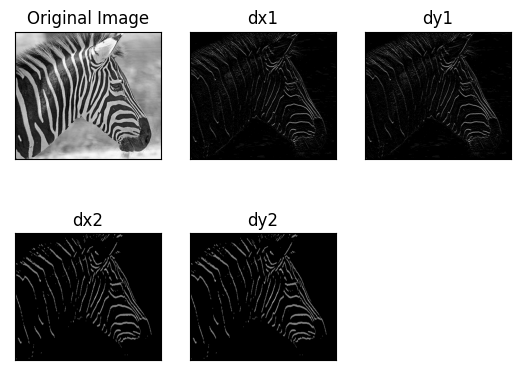

In [9]:
#Q3_b
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('zebrahead.jpg', 0)

# Set the sigma values
sigma1 = 1
sigma2 = 3

x = np.arange(-5, 6)
y = np.arange(-5, 6)

dx1 = -x * np.exp(-(x**2 + y**2)/(2*sigma1**2)) / (2*np.pi*sigma1**4)
dy1 = -y * np.exp(-(x**2 + y**2)/(2*sigma1**2)) / (2*np.pi*sigma1**4)

dx2 = -x * np.exp(-(x**2 + y**2)/(2*sigma2**2)) / (2*np.pi*sigma2**4)
dy2 = -y * np.exp(-(x**2 + y**2)/(2*sigma2**2)) / (2*np.pi*sigma2**4)

dx1_img = cv2.filter2D(img, -1, dx1)
dy1_img = cv2.filter2D(img, -1, dy1)
dx2_img = cv2.filter2D(img, -1, dx2)
dy2_img = cv2.filter2D(img, -1, dy2)

plt.subplot(231),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(dx1_img, cmap='gray')
plt.title('dx1'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(dy1_img, cmap='gray')
plt.title('dy1'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(dx2_img, cmap='gray')
plt.title('dx2'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(dy2_img, cmap='gray')
plt.title('dy2'), plt.xticks([]), plt.yticks([])
plt.show()


Q3_c
Edge detection in a picture uses derivatives of Gaussian kernels.

The magnitude of the gradient indicates the presence of edges, while the direction of the gradient indicates the orientation of the edge.

The definition and sharpness of the edges that are identified in the image depend on the sigma that is selected.

Whereas more blurred and less defined edges are produced by bigger sigma, sharper and more defined edges are produced by smaller sigma. The specific application and desired balance between edge sharpness and noise reduction will determine the appropriate sigma.

In [ ]:
#Q4_a
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('daisy.jpg')

rect = (50, 50, 200, 200)

mask = np.zeros(img.shape[:2], np.uint8)

cv2.grabCut(img, mask, rect, None, None, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 1) | (mask == 3), 255, 0).astype('uint8')

foreground = cv2.bitwise_and(img, img, mask=mask2)

background = cv2.subtract(img, foreground)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(mask2, cmap='gray')
ax[0].set_title('Segmentation Mask')
ax[1].imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
ax[1].set_title('Foreground')
ax[2].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
ax[2].set_title('Background')
plt.show()


In [ ]:
#Q4_b
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('daisy.jpg')

mask = np.zeros(img.shape[:2],np.uint8)

rect = (50,50,450,290)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

foreground = np.where((mask==1) + (mask==3), 255, 0).astype('uint8')
background = np.where((mask==0) + (mask==2), 255, 0).astype('uint8')

blur = cv2.GaussianBlur(background, (25, 25), 0)

result = cv2.bitwise_or(foreground, blur)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result, cmap='gray')
plt.title('Enhanced Image'), plt.xticks([]), plt.yticks([])
plt.show()


#Q4_c

Due to the Gaussian blur procedure, the area right outside the flower's margin appears dark in the enlarged image. A low-pass filter called Gaussian blur smoothes or blurs an image by reducing high-frequency material in it. The blur operation used a wide kernel of 51 x 51 pixels, which made the blur stretch fairly far beyond the boundaries of the flower. If the background was initially relatively bright, the pixels in the background may appear darker or even black due to the intense blurring. The contrast enhancement approach may also emphasize the brightness contrasts between the foreground object and the background, making the fuzzy background look even darker in contrast.

In [ ]:
#Q4_d
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('portrait.jpg')

blurred = cv2.GaussianBlur(img, (21, 21), 0)

mask = np.zeros(img.shape[:2], np.uint8)

ellipse = ((img.shape[1]//2, img.shape[0]//2), (img.shape[1]//2, img.shape[0]//3), 0)

mask = cv2.ellipse(mask, ellipse, 1, -1)

mask = cv2.bitwise_not(mask)

blurred_masked = cv2.bitwise_and(blurred, blurred, mask=mask)

result = cv2.addWeighted(img, 1, blurred_masked, 0.8, 0)

plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)),plt.title('Blurred Background')
plt.xticks([]), plt.yticks([])
plt.show()
